# **Prophet**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from prophet import Prophet
warnings.filterwarnings('ignore')

In [8]:
url_train='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/refs/heads/main/Forecasting/FbProphet/Data/dataset.csv'
df=pd.read_csv(url_train,sep=',')
df.shape

(1080, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time Date  1080 non-null   int64  
 1   Product    1080 non-null   int64  
 2   Store      1080 non-null   object 
 3   Value      1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


In [9]:
# valores nulos
df.isnull().sum()

Time Date    0
Product      0
Store        0
Value        0
dtype: int64

In [12]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [13]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [16]:
# existe un solo producto
print(df['Product'].value_counts())
# existe un solo store
print(df['Store'].value_counts())

Product
2667437    1080
Name: count, dtype: int64
Store
QLD_CW_ST0203    1080
Name: count, dtype: int64


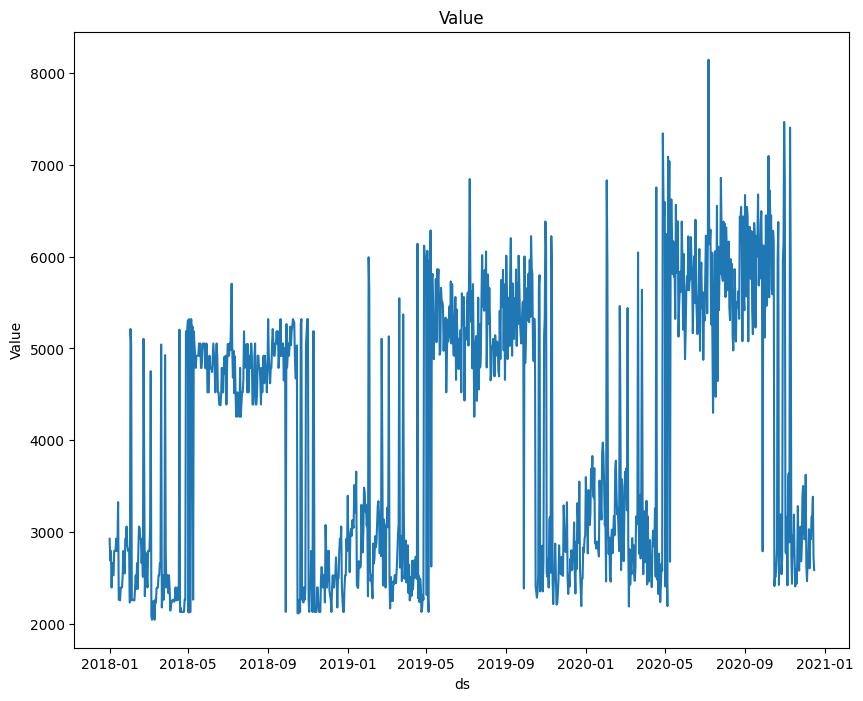

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='ds',y='Value')
plt.title('Value')
plt.show()

In [23]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df)

20:22:15 - cmdstanpy - INFO - Chain [1] start processing
20:22:16 - cmdstanpy - INFO - Chain [1] done processing


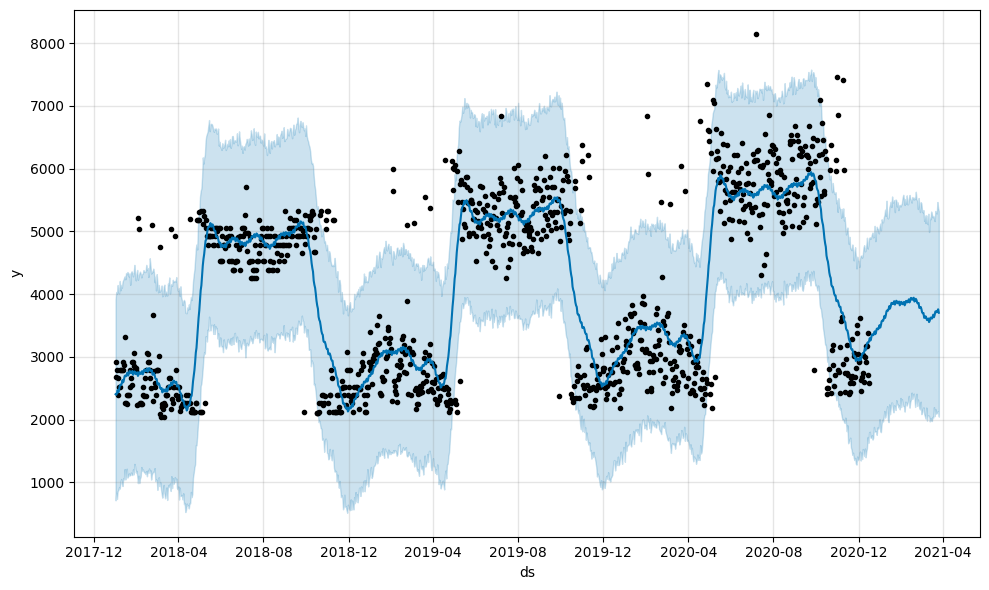

In [24]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()
plot1=m.plot(forecast)

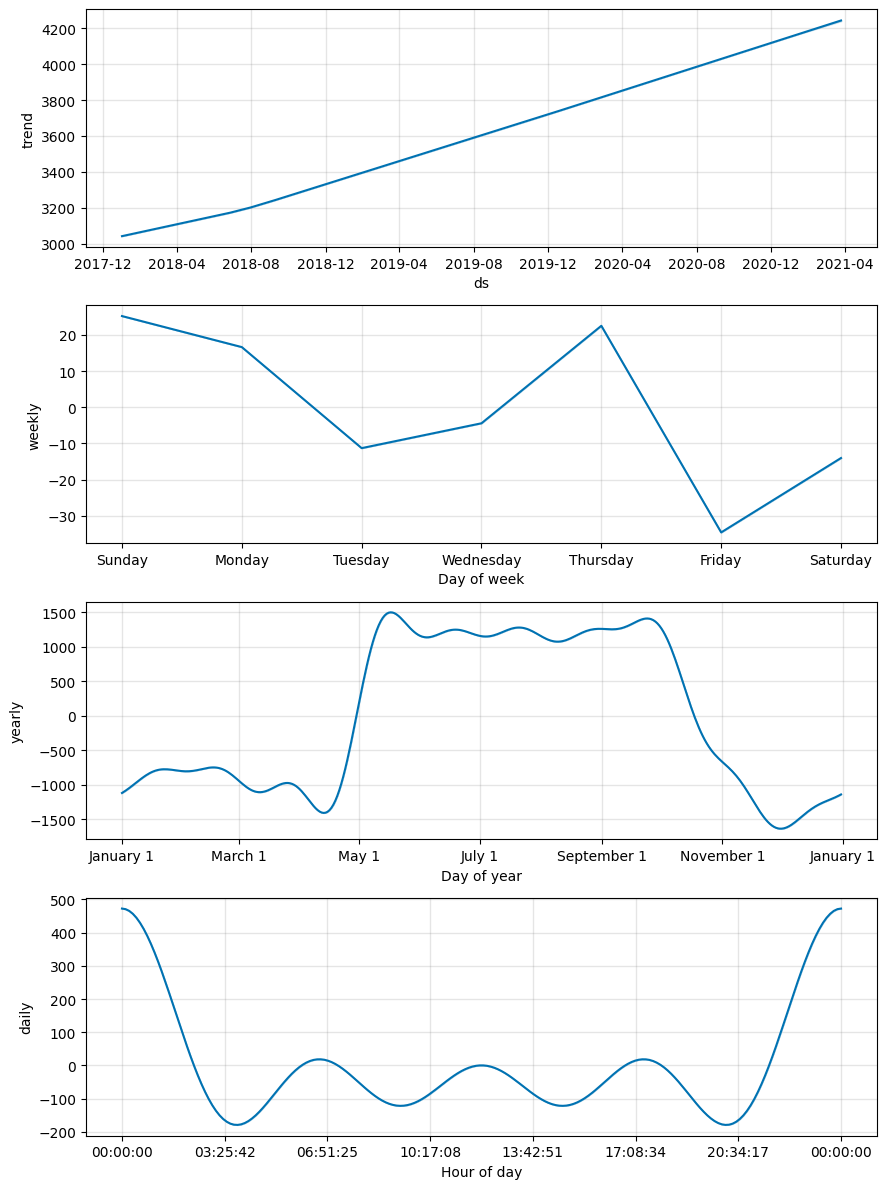

In [25]:
plt2=m.plot_components(forecast)

# **Forecaster**

In [35]:
print(df['ds'].min())
print(df['ds'].max())

2018-01-01 00:00:00
2020-12-16 00:00:00


In [26]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1175,2021-03-22,3727.936966,2095.178952,5304.609507
1176,2021-03-23,3711.554148,2103.472149,5286.470802
1177,2021-03-24,3727.168702,2132.509399,5469.200307
1178,2021-03-25,3759.477383,2131.852139,5373.711800
1179,2021-03-26,3703.942162,2048.578533,5322.221643


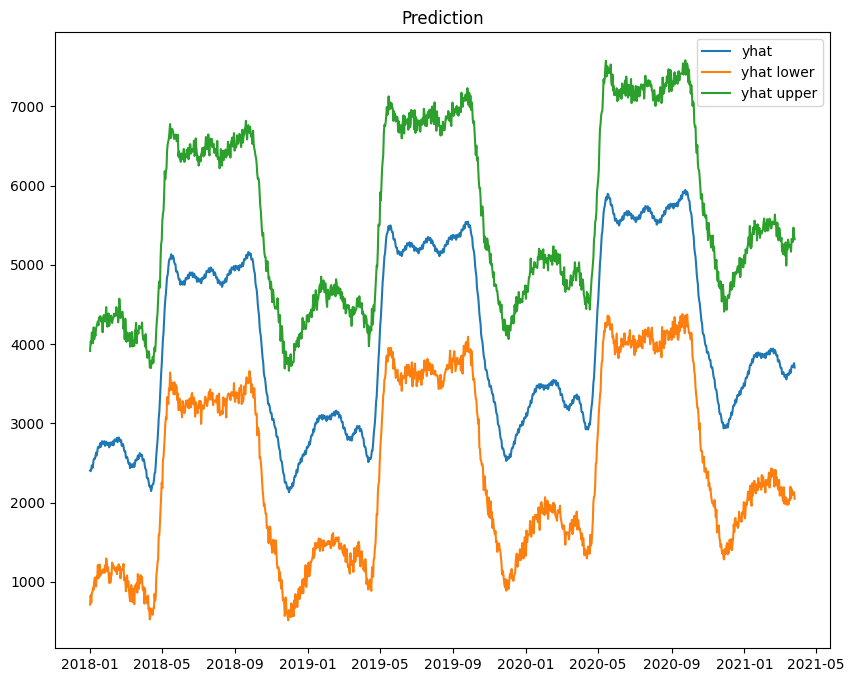

In [31]:
plt.figure(figsize=(10,8))
plt.plot(forecast['ds'],forecast['yhat'],label='yhat')
plt.plot(forecast['ds'],forecast['yhat_lower'],label='yhat lower')
plt.plot(forecast['ds'],forecast['yhat_upper'],label='yhat upper')
plt.title('Prediction')
plt.legend()
plt.show()

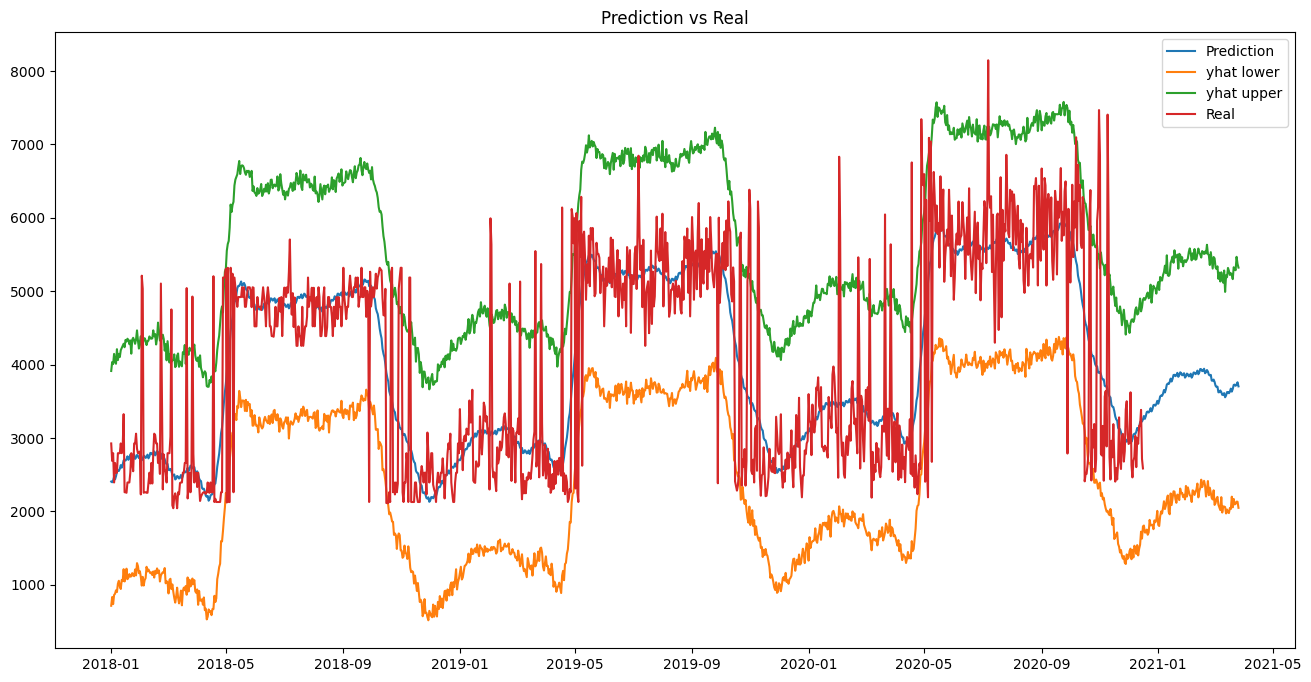

In [32]:
plt.figure(figsize=(16,8))
plt.plot(forecast['ds'],forecast['yhat'],label='Prediction')
plt.plot(forecast['ds'],forecast['yhat_lower'],label='yhat lower')
plt.plot(forecast['ds'],forecast['yhat_upper'],label='yhat upper')
plt.plot(df['ds'],df['y'],label='Real')
plt.title('Prediction vs Real')
plt.legend()
plt.show()